## 1. Classification

Goal: explore classifiers and investigate hyperparameters

Requirements: 
- repeat 50 times with different random splits (set the seed to get reproducible results)
- a 50:50 train:test split in all cases
- for each setting of the hyperparameter: a distribution over 50 different classification accuracies on the test set => [0:50]
- a box-plot
    - x: options for a parameter of the model
    - y: spread for classification accuracies of the classifier
    - must have: Titles and Axis Labels
    
7 classifiers:

(a)KNeighborsClassifier(Knearestneighbours)

(b)GaussianNB(theGaussianformofNaiveBayes) 

(c)DecisionTreeClassifier(Adecisiontree(DT))

(d)LogisticRegression(essentially,aperceptron) 

(e)GradientBoostingClassifier(GradientBoostedDTs) 

(f)RandomForestClassifier(RandomForest) 

(g)MLPClassifier(NeuralNetwork)

In [47]:
import openml
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy.random as rng
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")


In [49]:
# load datasets

# specify the dataset IDs
steel_id = 1504
ionosphere_id = 59
banknote_id = 1462

# fetch the dataset from OpenML
steel_dataset = openml.datasets.get_dataset(steel_id)
ionosphere_dataset = openml.datasets.get_dataset(ionosphere_id)
banknote_dataset = openml.datasets.get_dataset(banknote_id)

x_steel, labels_steel, _, _ = steel_dataset.get_data(
    target=steel_dataset.default_target_attribute)
x_ionosphere, labels_ionosphere, _, _ = ionosphere_dataset.get_data(
    target=ionosphere_dataset.default_target_attribute)
x_banknote, labels_banknote, _, _ = banknote_dataset.get_data(
    target=banknote_dataset.default_target_attribute)


In [50]:
ta_x_steel = te_x_steel = ta_y_steel = te_y_steel = []
ta_x_ionosphere = te_x_ionosphere = ta_y_ionosphere = te_y_ionosphere = []
ta_x_banknote = te_x_banknote = ta_y_banknote = te_y_banknote = []


In [51]:
def split_data(seed=0, split_rate=0.5):
    global ta_x_banknote, te_x_banknote, ta_y_banknote, te_y_banknote
    global ta_x_steel, te_x_steel, ta_y_steel, te_y_steel
    global ta_x_ionosphere, te_x_ionosphere, ta_y_ionosphere, te_y_ionosphere

    ta_x_steel, te_x_steel, ta_y_steel, te_y_steel = train_test_split(
        x_steel, labels_steel, test_size=split_rate, random_state=seed)

    ta_x_ionosphere, te_x_ionosphere, ta_y_ionosphere, te_y_ionosphere = train_test_split(
        x_ionosphere, labels_ionosphere, test_size=split_rate, random_state=seed)

    ta_x_banknote, te_x_banknote, ta_y_banknote, te_y_banknote = train_test_split(
        x_banknote, labels_banknote, test_size=split_rate, random_state=seed)


**1.3.i. 7 classifiers and 3 datasets**

In [52]:
def plot(classifier_type, banknote_scores, ionosphere_scores, steel_scores, ticks):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    # Plot the first box plot in the first subplot
    axes[0].boxplot(steel_scores)
    axes[0].set_title('steel-plates-fault')
    axes[0].set_xlabel('Parameter Value')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xticklabels(ticks)

    # Plot the second box plot in the second subplot
    axes[1].boxplot(ionosphere_scores)
    axes[1].set_title('ionosphere')
    axes[1].set_xlabel('Parameter Value')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_xticklabels(ticks)

    # Plot the third box plot in the third subplot
    axes[2].boxplot(banknote_scores)
    axes[2].set_title('banknotes')
    axes[2].set_xlabel('Parameter Value')
    axes[2].set_ylabel('Accuracy')
    axes[2].set_xticklabels(ticks)

    # Adjust the layout to prevent overlapping of the subplots
    plt.tight_layout()
    # Adjust the layout to prevent overlapping of the subplots
    plt.tight_layout()

    plt.show()


In [53]:
# KNNs
def get_knn_accuracy(neighbors):
    knn_banknote = KNeighborsClassifier(n_neighbors=neighbors)
    knn_banknote.fit(ta_x_banknote, ta_y_banknote)

    knn_ionosphere = KNeighborsClassifier(n_neighbors=neighbors)
    knn_ionosphere.fit(ta_x_ionosphere, ta_y_ionosphere)

    knn_steel = KNeighborsClassifier(n_neighbors=neighbors)
    knn_steel.fit(ta_x_steel, ta_y_steel)

    accuracy_banknote = knn_banknote.score(te_x_banknote, te_y_banknote)
    accuracy_ionosphere = knn_ionosphere.score(
        te_x_ionosphere, te_y_ionosphere)
    accuracy_steel = knn_steel.score(te_x_steel, te_y_steel)

    return accuracy_banknote, accuracy_ionosphere, accuracy_steel

# Gaussian - Naive Bayes


def get_GaussianNB_accuracy(smoothing):

    gnb_banknote = GaussianNB(var_smoothing=smoothing)
    gnb_banknote.fit(ta_x_banknote, ta_y_banknote)

    gnb_ionosphere = GaussianNB(var_smoothing=smoothing)
    gnb_ionosphere.fit(ta_x_ionosphere, ta_y_ionosphere)

    gnb_steel = GaussianNB(var_smoothing=smoothing)
    gnb_steel.fit(ta_x_steel, ta_y_steel)

    accuracy_banknote = gnb_banknote.score(te_x_banknote, te_y_banknote)
    accuracy_ionosphere = gnb_ionosphere.score(
        te_x_ionosphere, te_y_ionosphere)
    accuracy_steel = gnb_steel.score(te_x_steel, te_y_steel)

    return accuracy_banknote, accuracy_ionosphere, accuracy_steel

# Decision Tree


def get_DecisionTree_accuracy(max_depth):
    dt_banknote = DecisionTreeClassifier(max_depth=max_depth)
    dt_banknote.fit(ta_x_banknote, ta_y_banknote)

    dt_ionosphere = DecisionTreeClassifier(max_depth=max_depth)
    dt_ionosphere.fit(ta_x_ionosphere, ta_y_ionosphere)

    dt_steel = DecisionTreeClassifier(max_depth=max_depth)
    dt_steel.fit(ta_x_steel, ta_y_steel)

    accuracy_banknote = dt_banknote.score(te_x_banknote, te_y_banknote)
    accuracy_ionosphere = dt_ionosphere.score(te_x_ionosphere, te_y_ionosphere)
    accuracy_steel = dt_steel.score(te_x_steel, te_y_steel)

    return accuracy_banknote, accuracy_ionosphere, accuracy_steel

# Logistic Regression


def get_LogReg_accuracy(c):
    logreg_banknote = LogisticRegression(C=c)
    logreg_banknote.fit(ta_x_banknote, ta_y_banknote)

    logreg_ionosphere = LogisticRegression(C=c)
    logreg_ionosphere.fit(ta_x_ionosphere, ta_y_ionosphere)

    logreg_steel = LogisticRegression(C=c)
    logreg_steel.fit(ta_x_steel, ta_y_steel)

    accuracy_banknote = logreg_banknote.score(te_x_banknote, te_y_banknote)
    accuracy_ionosphere = logreg_ionosphere.score(
        te_x_ionosphere, te_y_ionosphere)
    accuracy_steel = logreg_steel.score(te_x_steel, te_y_steel)

    return accuracy_banknote, accuracy_ionosphere, accuracy_steel

# Gradient Boosting


def get_GradientBoosting_accuracy(max_depth):
    gb_banknote = GradientBoostingClassifier(max_depth=max_depth)
    gb_banknote.fit(ta_x_banknote, ta_y_banknote)

    gb_ionosphere = GradientBoostingClassifier(max_depth=max_depth)
    gb_ionosphere.fit(ta_x_ionosphere, ta_y_ionosphere)

    gb_steel = GradientBoostingClassifier(max_depth=max_depth)
    gb_steel.fit(ta_x_steel, ta_y_steel)

    accuracy_banknote = gb_banknote.score(te_x_banknote, te_y_banknote)
    accuracy_ionosphere = gb_ionosphere.score(te_x_ionosphere, te_y_ionosphere)
    accuracy_steel = gb_steel.score(te_x_steel, te_y_steel)

    return accuracy_banknote, accuracy_ionosphere, accuracy_steel

# Random Forest


def get_RandomForest_accuracy(max_depth):
    rf_banknote = RandomForestClassifier(max_depth=max_depth)
    rf_banknote.fit(ta_x_banknote, ta_y_banknote)

    rf_ionosphere = RandomForestClassifier(max_depth=max_depth)
    rf_ionosphere.fit(ta_x_ionosphere, ta_y_ionosphere)

    rf_steel = RandomForestClassifier(max_depth=max_depth)
    rf_steel.fit(ta_x_steel, ta_y_steel)

    accuracy_banknote = rf_banknote.score(te_x_banknote, te_y_banknote)
    accuracy_ionosphere = rf_ionosphere.score(te_x_ionosphere, te_y_ionosphere)
    accuracy_steel = rf_steel.score(te_x_steel, te_y_steel)

    return accuracy_banknote, accuracy_ionosphere, accuracy_steel

# Neural Network


def get_MLP_accuracy(alpha):
    mlp_banknote = MLPClassifier(alpha=alpha)
    mlp_banknote.fit(ta_x_banknote, ta_y_banknote)

    mlp_ionosphere = MLPClassifier(alpha=alpha)
    mlp_ionosphere.fit(ta_x_ionosphere, ta_y_ionosphere)

    mlp_steel = MLPClassifier(alpha=alpha)
    mlp_steel.fit(ta_x_steel, ta_y_steel)

    accuracy_banknote = mlp_banknote.score(te_x_banknote, te_y_banknote)
    accuracy_ionosphere = mlp_ionosphere.score(te_x_ionosphere, te_y_ionosphere)
    accuracy_steel = mlp_steel.score(te_x_steel, te_y_steel)

    return accuracy_banknote, accuracy_ionosphere, accuracy_steel


In [75]:
def find_best_mean_value(classifier, dataset, accuracy_scores, parameter):
    t_scores = np.array(accuracy_scores).T
    mean_test_errors = []

    for scores in t_scores:
        test_errors = [1 - accuracy for accuracy in scores]
        mean_test_error = np.mean(test_errors)
        
        mean_test_errors.append(mean_test_error)

    best_mean = np.min(mean_test_errors)

    index = mean_test_errors.index(best_mean)
    best_param = parameter[index]

    print(f"best mean value of test errors for {classifier} of {dataset} dataset: {best_mean} and best param: {best_param}")

    return best_mean, best_param

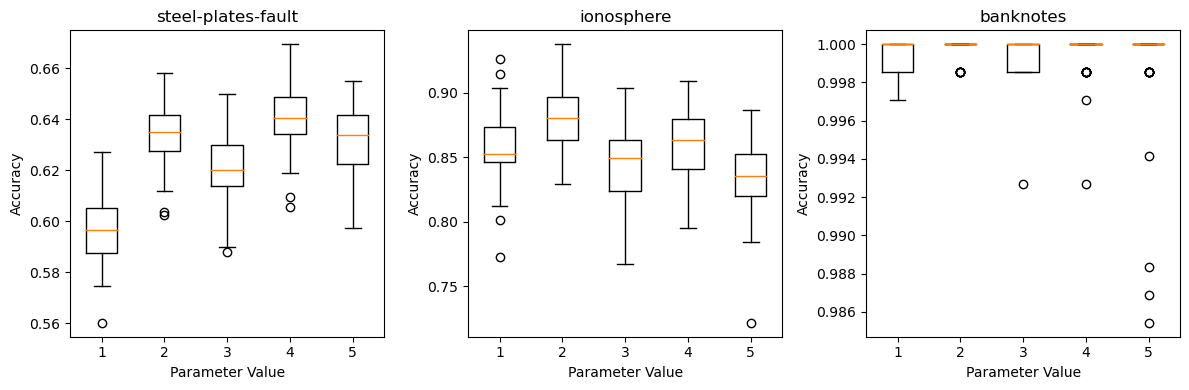

In [54]:
# KNN
knn_banknote_scores = []
knn_ionosphere_scores = []
knn_steel_scores = []

num_repeats = 50
split_rate = 0.5

# options to try
# KNN
n_neighbors = [1, 2, 3, 4, 5]

for i in range(num_repeats):
    split_data(i, split_rate)

    # KNNs classifier
    for neighbors in n_neighbors:
        accuracy_steel, accuracy_ionosphere, accuracy_banknote = get_knn_accuracy(
            neighbors)
        knn_banknote_scores.append(accuracy_banknote)
        knn_ionosphere_scores.append(accuracy_ionosphere)
        knn_steel_scores.append(accuracy_steel)

# reshape the scores for box plot visualization
knn_banknote_scores = np.array(knn_banknote_scores).reshape(
    num_repeats, len(n_neighbors))
knn_ionosphere_scores = np.array(knn_ionosphere_scores).reshape(
    num_repeats, len(n_neighbors))
knn_steel_scores = np.array(knn_steel_scores).reshape(
    num_repeats, len(n_neighbors))

plot("KNNs classifier", knn_banknote_scores,
     knn_ionosphere_scores, knn_steel_scores, n_neighbors)

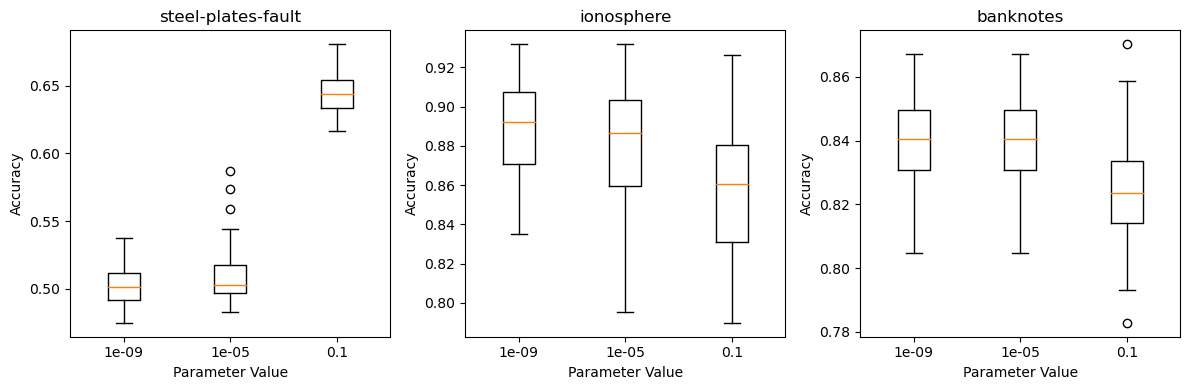

In [56]:
# Gaussian - Naive Bayes
gnb_banknote_scores = []
gnb_ionosphere_scores = []
gnb_steel_scores = []

num_repeats = 50
split_rate = 0.5

# options to try
# Gaussian - Naive Bayes
alpha_gnb = [1e-9, 1e-5, 1e-1]

for i in range(num_repeats):
    split_data(i, split_rate)

    # Gaussian - Naive Bayes
    for alpha in alpha_gnb:
        accuracy_banknote, accuracy_ionosphere, accuracy_steel = get_GaussianNB_accuracy(
            alpha)
        gnb_banknote_scores.append(accuracy_banknote)
        gnb_ionosphere_scores.append(accuracy_ionosphere)
        gnb_steel_scores.append(accuracy_steel)

# reshape the scores for box plot visualization
gnb_banknote_scores = np.array(gnb_banknote_scores).reshape(
    num_repeats, len(alpha_gnb))
gnb_ionosphere_scores = np.array(
    gnb_ionosphere_scores).reshape(num_repeats, len(alpha_gnb))
gnb_steel_scores = np.array(gnb_steel_scores).reshape(
    num_repeats, len(alpha_gnb))


plot("Gaussian based Naive Bayes classifier", gnb_banknote_scores,
     gnb_ionosphere_scores, gnb_steel_scores, alpha_gnb)




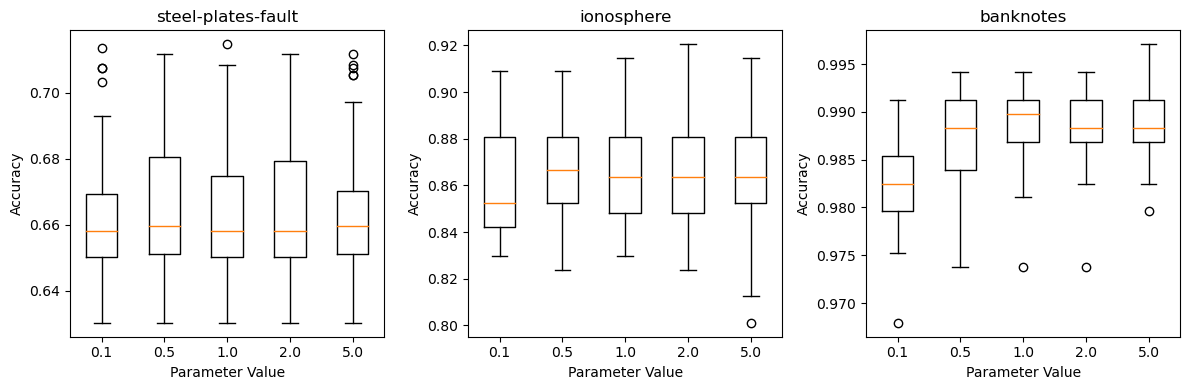

In [57]:
# Logistic Regression
logreg_banknote_scores = []
logreg_ionosphere_scores = []
logreg_steel_scores = []

# Logistic Regression - Perceptron
#perceptron_banknote_scores = []
#perceptron_ionosphere_scores = []
#perceptron_steel_scores = []

num_repeats = 50
split_rate = 0.5

# options to try
# Logistic Regression
c_logreg = [0.1, 0.5, 1.0, 2.0, 5.0]
# Logistic Regression - Perceptron
#tol_perceptron = [1e-3, 1e-2, 1e-1, 1e-0, 1e+1]
#random_state_perceptron = [3]

for i in range(num_repeats):
    split_data(i, split_rate)

    # Logistic Regression classifier
    for c in c_logreg:
        accuracy_steel, accuracy_ionosphere, accuracy_banknote = get_LogReg_accuracy(
            c)
        logreg_banknote_scores.append(accuracy_banknote)
        logreg_ionosphere_scores.append(accuracy_ionosphere)
        logreg_steel_scores.append(accuracy_steel)

# reshape the scores for box plot visualization
logreg_banknote_scores = np.array(
    logreg_banknote_scores).reshape(num_repeats, len(c_logreg))
logreg_ionosphere_scores = np.array(
    logreg_ionosphere_scores).reshape(num_repeats, len(c_logreg))
logreg_steel_scores = np.array(
    logreg_steel_scores).reshape(num_repeats, len(c_logreg))

plot("Logistic Regression classifier", logreg_banknote_scores,
     logreg_ionosphere_scores, logreg_steel_scores, c_logreg)


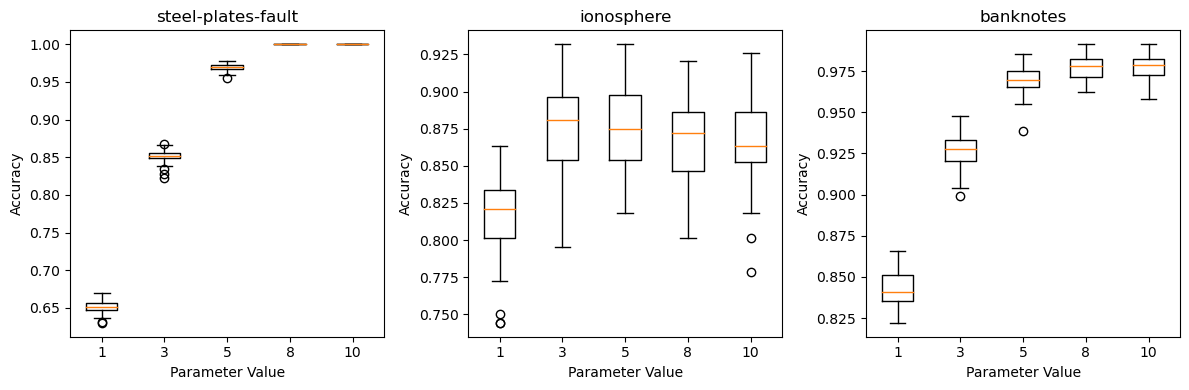

In [58]:
# Decision Tree
dt_banknote_scores = []
dt_ionosphere_scores = []
dt_steel_scores = []

num_repeats = 50
split_rate = 0.5

# options to try
# Decision Tree
max_depth_dt = [1, 3, 5, 8, 10]

for i in range(num_repeats):
    split_data(i, split_rate)

    # Decision Tree classifier
    for max_depth in max_depth_dt:
        accuracy_steel, accuracy_ionosphere, accuracy_banknote = get_DecisionTree_accuracy(
            max_depth)
        dt_banknote_scores.append(accuracy_banknote)
        dt_ionosphere_scores.append(accuracy_ionosphere)
        dt_steel_scores.append(accuracy_steel)

# reshape the scores for box plot visualization
dt_banknote_scores = np.array(dt_banknote_scores).reshape(
    num_repeats, len(max_depth_dt))
dt_ionosphere_scores = np.array(dt_ionosphere_scores).reshape(
    num_repeats, len(max_depth_dt))
dt_steel_scores = np.array(dt_steel_scores).reshape(
    num_repeats, len(max_depth_dt))

plot("Decision Tree classifier", dt_banknote_scores,
     dt_ionosphere_scores, dt_steel_scores, max_depth_dt)


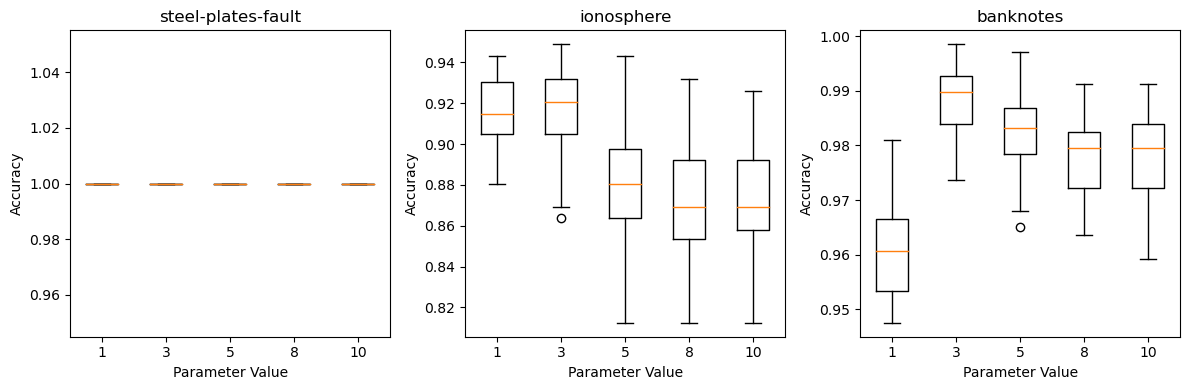

In [59]:
# Gradient Boosting
gb_banknote_scores = []
gb_ionosphere_scores = []
gb_steel_scores = []

num_repeats = 50
split_rate = 0.5

# options to try
# Gradient Boosting
max_depth_gb = [1, 3, 5, 8, 10]

for i in range(num_repeats):
    split_data(i, split_rate)

    # Gradient Boosting classifier
    for max_depth in max_depth_gb:
        accuracy_steel, accuracy_ionosphere, accuracy_banknote = get_GradientBoosting_accuracy(
            max_depth)
        gb_banknote_scores.append(accuracy_banknote)
        gb_ionosphere_scores.append(accuracy_ionosphere)
        gb_steel_scores.append(accuracy_steel)

# reshape the scores for box plot visualization
gb_banknote_scores = np.array(gb_banknote_scores).reshape(
    num_repeats, len(max_depth_gb))
gb_ionosphere_scores = np.array(gb_ionosphere_scores).reshape(
    num_repeats, len(max_depth_gb))
gb_steel_scores = np.array(gb_steel_scores).reshape(
    num_repeats, len(max_depth_gb))

plot("Gradient Boosting classifier", gb_banknote_scores,
     gb_ionosphere_scores, gb_steel_scores, max_depth_gb)


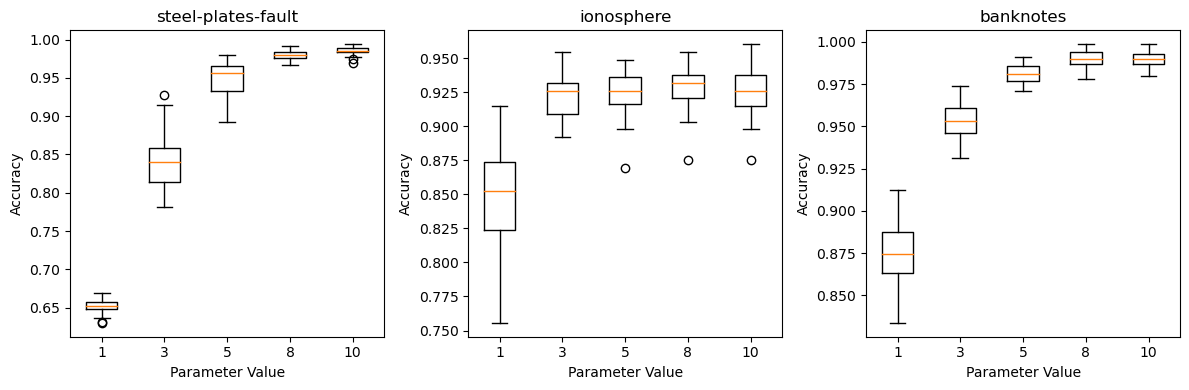

In [60]:
# Random Forest
rf_banknote_scores = []
rf_ionosphere_scores = []
rf_steel_scores = []

num_repeats = 50
split_rate = 0.5

# options to try
# Random Forest
max_depth_rf = [1, 3, 5, 8, 10]

for i in range(num_repeats):
    split_data(i, split_rate)

    # Random Forest classifier
    for max_depth in max_depth_rf:
        accuracy_steel, accuracy_ionosphere, accuracy_banknote = get_RandomForest_accuracy(
            max_depth)
        rf_banknote_scores.append(accuracy_banknote)
        rf_ionosphere_scores.append(accuracy_ionosphere)
        rf_steel_scores.append(accuracy_steel)

# reshape the scores for box plot visualization
rf_banknote_scores = np.array(rf_banknote_scores).reshape(
    num_repeats, len(max_depth_rf))
rf_ionosphere_scores = np.array(rf_ionosphere_scores).reshape(
    num_repeats, len(max_depth_rf))
rf_steel_scores = np.array(rf_steel_scores).reshape(
    num_repeats, len(max_depth_rf))

plot("Random Forest classifier", rf_banknote_scores,
     rf_ionosphere_scores, rf_steel_scores, max_depth_rf)


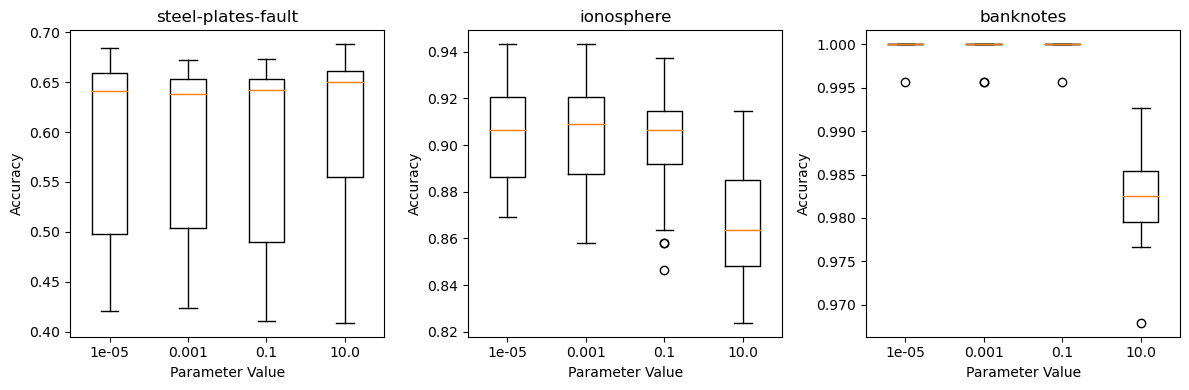

In [61]:
# Neural Network
mlp_banknote_scores = []
mlp_ionosphere_scores = []
mlp_steel_scores = []

num_repeats = 50
split_rate = 0.5

# options to try
# Neural Network
alpha_mlp = [1e-5, 1e-3, 0.1, 10.0]

for i in range(num_repeats):
    split_data(i, split_rate)

    # Neural Network classifier
    for alpha in alpha_mlp:
        accuracy_steel, accuracy_ionosphere, accuracy_banknote = get_MLP_accuracy(
            alpha)
        mlp_banknote_scores.append(accuracy_banknote)
        mlp_ionosphere_scores.append(accuracy_ionosphere)
        mlp_steel_scores.append(accuracy_steel)

# reshape the scores for box plot visualization
mlp_banknote_scores = np.array(mlp_banknote_scores).reshape(
    num_repeats, len(alpha_mlp))
mlp_ionosphere_scores = np.array(
    mlp_ionosphere_scores).reshape(num_repeats, len(alpha_mlp))
mlp_steel_scores = np.array(mlp_steel_scores).reshape(
    num_repeats, len(alpha_mlp))

plot("Neural Network classifier", mlp_banknote_scores,
     mlp_ionosphere_scores, mlp_steel_scores, alpha_mlp)


In [76]:
find_best_mean_value("Knn","Steel Plates Fault",knn_steel_scores, n_neighbors)
find_best_mean_value("Knn","Ionosphere",knn_ionosphere_scores, n_neighbors)
find_best_mean_value("Knn","Banknotes",knn_banknote_scores, n_neighbors)

find_best_mean_value("GaussianNB","Steel Plates Fault",gnb_steel_scores, alpha_gnb)
find_best_mean_value("GaussianNB","Ionosphere",gnb_ionosphere_scores, alpha_gnb)
find_best_mean_value("GaussianNB","Banknotes",gnb_banknote_scores, alpha_gnb)

find_best_mean_value("Logistic Regression","Steel Plates Fault",logreg_steel_scores, c_logreg)
find_best_mean_value("Logistic Regression","Ionosphere",logreg_ionosphere_scores, c_logreg)
find_best_mean_value("Logistic Regression","Banknotes",logreg_banknote_scores, c_logreg)

find_best_mean_value("Decision Tree","Steel Plates Fault",dt_steel_scores, max_depth_dt)
find_best_mean_value("Decision Tree","Ionosphere",dt_ionosphere_scores, max_depth_dt)
find_best_mean_value("Decision Tree","Banknotes",dt_banknote_scores, max_depth_dt)

find_best_mean_value("Gradient Boosting","Steel Plates Fault",gb_steel_scores, max_depth_gb)
find_best_mean_value("Gradient Boosting","Ionosphere",gb_ionosphere_scores, max_depth_gb)
find_best_mean_value("Gradient Boosting","Banknotes",gb_banknote_scores, max_depth_gb)

find_best_mean_value("Random Forest","Steel Plates Fault",rf_steel_scores, max_depth_rf)
find_best_mean_value("Random Forest","Ionosphere",rf_ionosphere_scores, max_depth_rf)
find_best_mean_value("Random Forest","Banknotes",rf_banknote_scores, max_depth_rf)

find_best_mean_value("MLP","Steel Plates Fault",mlp_steel_scores, alpha_mlp)
find_best_mean_value("MLP","Ionosphere",mlp_ionosphere_scores, alpha_mlp)
find_best_mean_value("MLP","Banknotes",mlp_banknote_scores, alpha_mlp)

best mean value of test errors for Knn of Steel Plates Fault dataset: 0.3599176107106076 and best param: 4
best mean value of test errors for Knn of Ionosphere dataset: 0.11863636363636364 and best param: 2
best mean value of test errors for Knn of Banknotes dataset: 0.00020408163265306812 and best param: 2
best mean value of test errors for GaussianNB of Steel Plates Fault dataset: 0.35520082389289387 and best param: 0.1
best mean value of test errors for GaussianNB of Ionosphere dataset: 0.11159090909090909 and best param: 1e-09
best mean value of test errors for GaussianNB of Banknotes dataset: 0.1599708454810496 and best param: 1e-09
best mean value of test errors for Logistic Regression of Steel Plates Fault dataset: 0.33441812564366635 and best param: 0.5
best mean value of test errors for Logistic Regression of Ionosphere dataset: 0.1334090909090909 and best param: 2.0
best mean value of test errors for Logistic Regression of Banknotes dataset: 0.01099125364431486 and best param

(8.746355685131269e-05, 1e-05)

## 2. Clustering

Creating 3 toy datasets by using:
- make_blobs()
- make_classification(”n_clusters_per_class=1”)
- make_circles(”noise=0.3”)

Each dataset will have:
- 1000 examples/instances
- 2 input features (for "make_classification", "n_informative=2")

Keep other hyperparameters as default.

Set the seed in the dataset generators to get reproducible results.

Trying out 7 clustering algorithms:
1. K-Means
2. Affinity Propagation
3. DDBSCAN
4. Gaussian Mixture Model
5. BIRCH
6. Agglomerative Clustering
7. Mean Shift

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_classification, make_circles

# Centroid clustering/Partitioning clustering
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
# Density clustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
# Connectivity clustering
from sklearn.cluster import AgglomerativeClustering  # Hierarchical
from sklearn.cluster import Birch
# Distribution clustering
from sklearn.mixture import GaussianMixture


In [64]:
seed = 42
n_samples = 1000

X_blob, y_blob = make_blobs(
    n_samples=n_samples, n_features=2, random_state=seed)
X_clf, y_clf = make_classification(
    n_samples=n_samples, n_clusters_per_class=1, n_informative=2, random_state=seed)
X_circle, y_circle = make_circles(n_samples=1000, noise=0.3, random_state=seed)


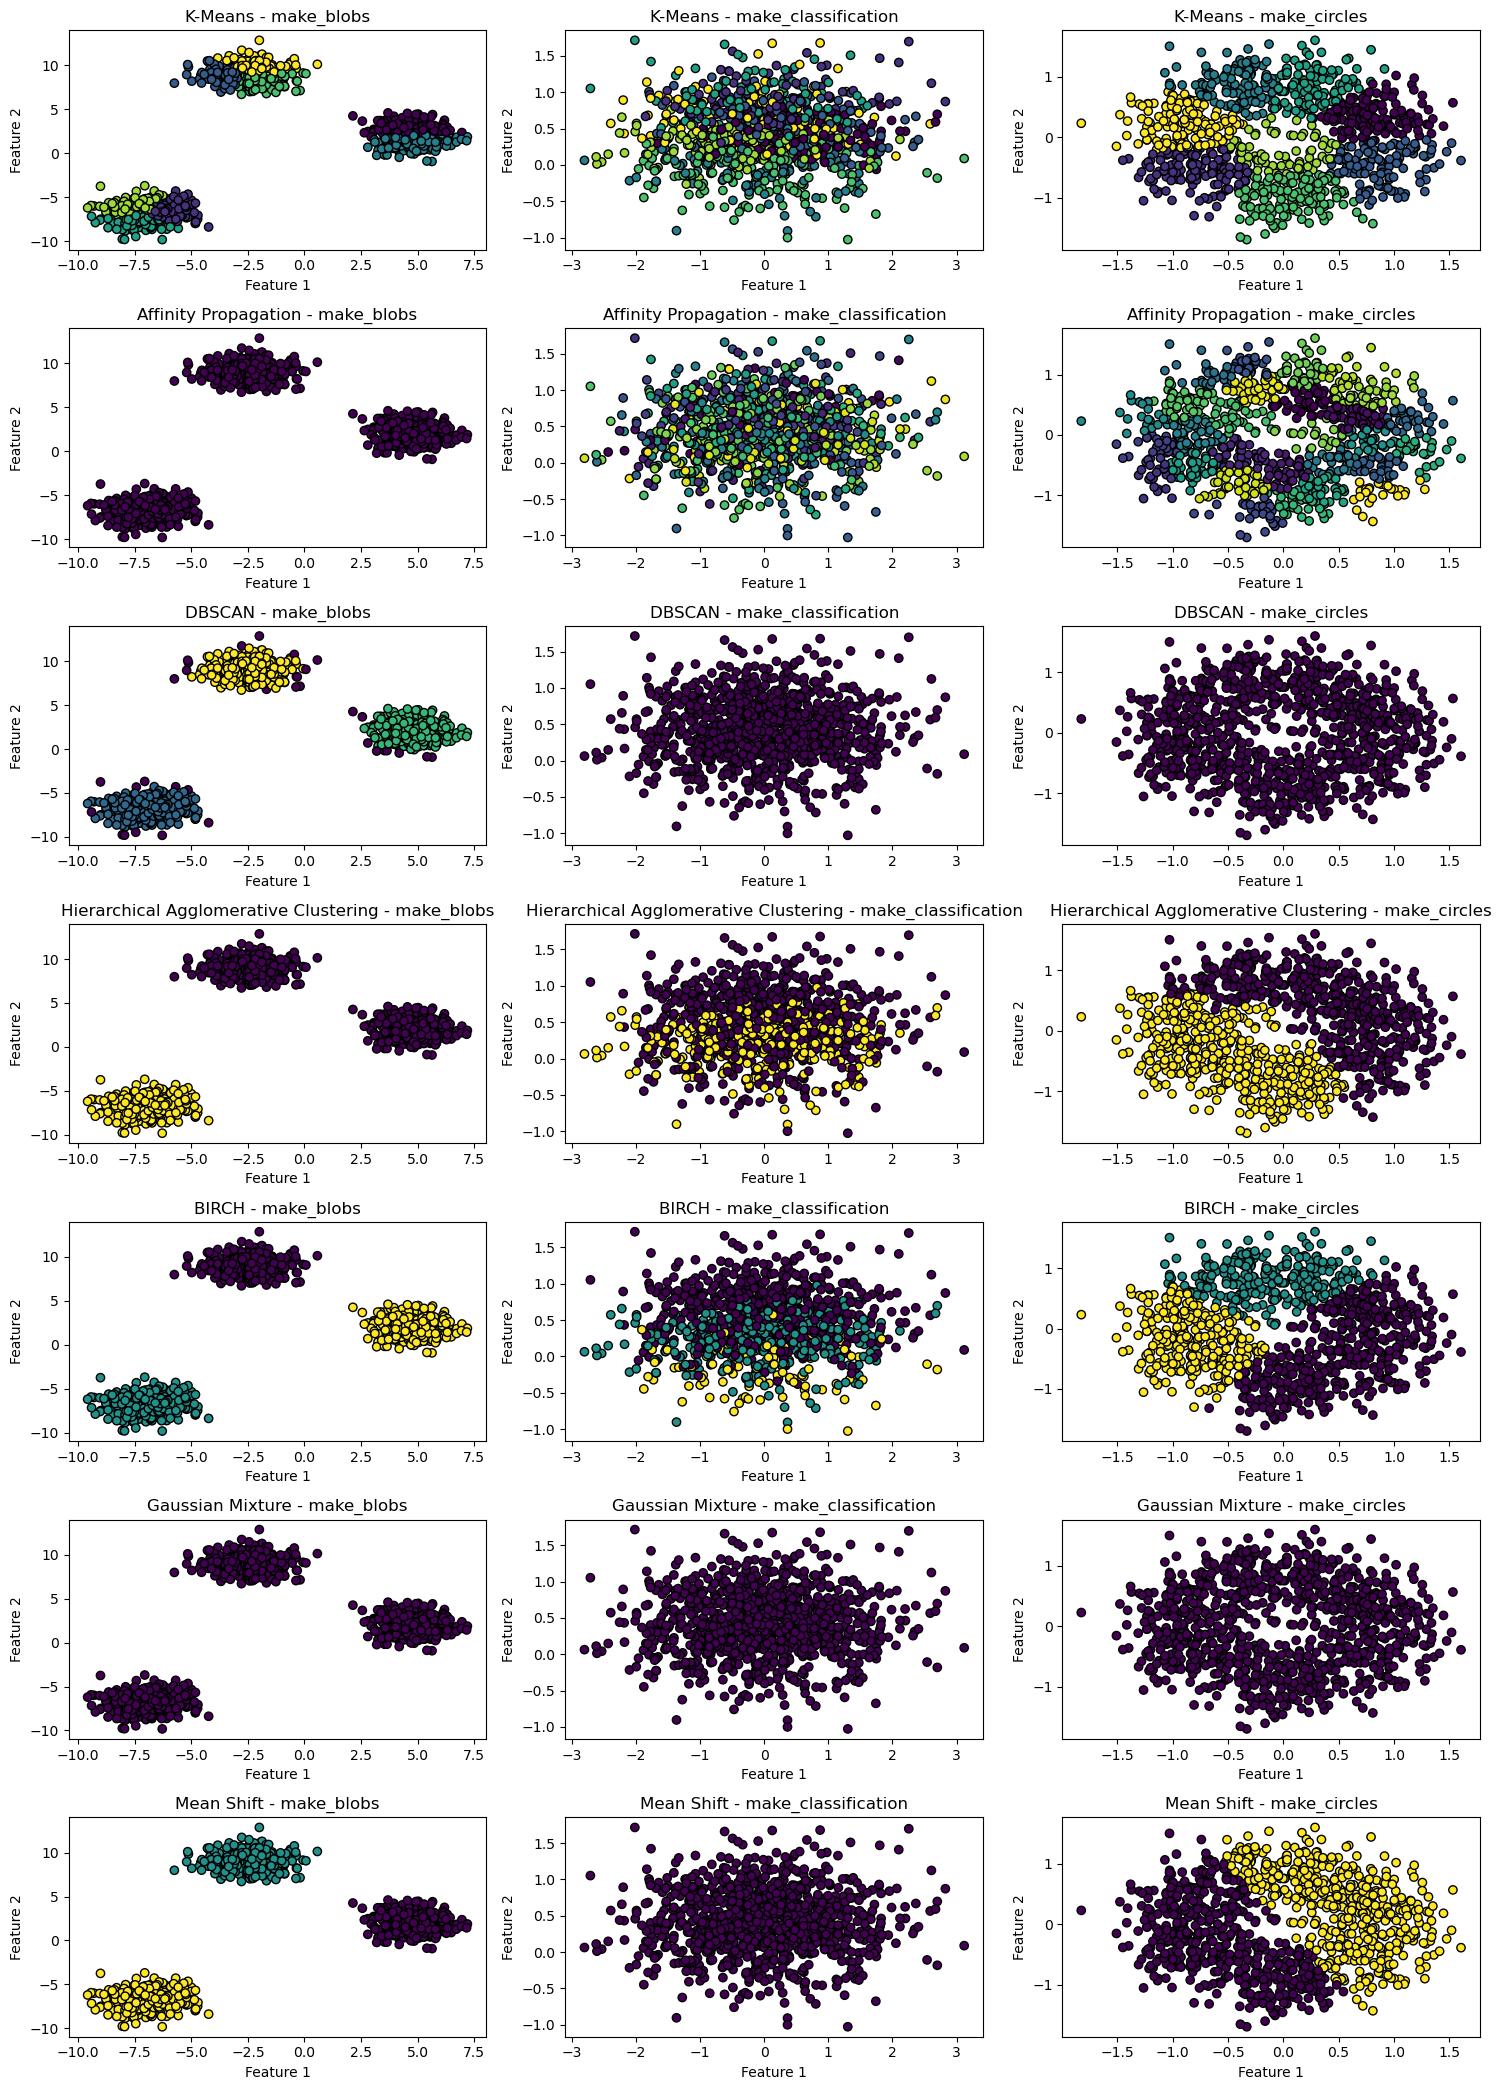

In [65]:
# K-Means
kmeans = KMeans(random_state=2)
kmeans.fit_predict(X_blob)

fig, axes = plt.subplots(7, 3, figsize=(15, 21))
for j, dataset in enumerate([(X_blob, "make_blobs"), (X_clf, "make_classification"), (X_circle, "make_circles")]):
    X, dataset_name = dataset
    y = kmeans.fit_predict(X)
    axes[0, j].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
    axes[0, j].set_title(f"K-Means - {dataset_name}")
    axes[0, j].set_xlabel('Feature 1')
    axes[0, j].set_ylabel('Feature 2')


# Affinity Propagation
af_clustering = AffinityPropagation(random_state=seed)
af_clustering.fit(X_blob)

for j, dataset in enumerate([(X_blob, "make_blobs"), (X_clf, "make_classification"), (X_circle, "make_circles")]):
    X, dataset_name = dataset
    y = af_clustering.fit_predict(X)
    axes[1, j].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
    axes[1, j].set_title(f"Affinity Propagation - {dataset_name}")
    axes[1, j].set_xlabel('Feature 1')
    axes[1, j].set_ylabel('Feature 2')


# DBSCAN
db_clustering = DBSCAN()
db_clustering.fit(X_blob)

for j, dataset in enumerate([(X_blob, "make_blobs"), (X_clf, "make_classification"), (X_circle, "make_circles")]):
    X, dataset_name = dataset
    y = db_clustering.fit_predict(X)
    axes[2, j].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
    axes[2, j].set_title(f"DBSCAN - {dataset_name}")
    axes[2, j].set_xlabel('Feature 1')
    axes[2, j].set_ylabel('Feature 2')

# Hierarchical Agglomerative Clustering
agg_clustering = AgglomerativeClustering()
agg_clustering.fit(X_blob)

for j, dataset in enumerate([(X_blob, "make_blobs"), (X_clf, "make_classification"), (X_circle, "make_circles")]):
    X, dataset_name = dataset
    y = agg_clustering.fit_predict(X)
    axes[3, j].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
    axes[3, j].set_title(
        f"Hierarchical Agglomerative Clustering - {dataset_name}")
    axes[3, j].set_xlabel('Feature 1')
    axes[3, j].set_ylabel('Feature 2')

# BIRCH
brc_clustering = Birch()
brc_clustering.fit(X_blob)

for j, dataset in enumerate([(X_blob, "make_blobs"), (X_clf, "make_classification"), (X_circle, "make_circles")]):
    X, dataset_name = dataset
    y = brc_clustering.fit_predict(X)
    axes[4, j].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
    axes[4, j].set_title(f"BIRCH - {dataset_name}")
    axes[4, j].set_xlabel('Feature 1')
    axes[4, j].set_ylabel('Feature 2')

# Gaussian Mixture
gm_clustering = GaussianMixture(random_state=seed)
gm_clustering.fit(X_blob)

for j, dataset in enumerate([(X_blob, "make_blobs"), (X_clf, "make_classification"), (X_circle, "make_circles")]):
    X, dataset_name = dataset
    y = gm_clustering.fit_predict(X)
    axes[5, j].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
    axes[5, j].set_title(f"Gaussian Mixture - {dataset_name}")
    axes[5, j].set_xlabel('Feature 1')
    axes[5, j].set_ylabel('Feature 2')

# Mean Shift
ms_clustering = MeanShift()
ms_clustering.fit(X_blob)

for j, dataset in enumerate([(X_blob, "make_blobs"), (X_clf, "make_classification"), (X_circle, "make_circles")]):
    X, dataset_name = dataset
    y = ms_clustering.fit_predict(X)
    axes[6, j].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
    axes[6, j].set_title(f"Mean Shift - {dataset_name}")
    axes[6, j].set_xlabel('Feature 1')
    axes[6, j].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()
